## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 10.7: all sky map of NII emission from the Warm Ionized Medium 

#### uses fits file downloaded from NASA Legacy Archive for Microwave Background Analysis (https://lambda.gsfc.nasa.gov/product/cobe/firas_lem_get.cfm)
#### (same as for the CII map in Figure 5.5 though the NII signal-to-noise ratio is unfortunately lower)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
from astropy.visualization import (ImageNormalize, MinMaxInterval, SqrtStretch, LogStretch, SinhStretch, AsinhStretch)
from scipy.interpolate import griddata
%matplotlib inline

In [18]:
# read in data and prepare for plotting
hdu = fits.open('../atomic/FIRAS_LINE_EMISSION_MAP_HIGH.fits')

# get the NII line flux at each (l,b)
# LINFRQ9 =              2459.4  / [N II] line frequency, in GHz
# figured the data axis out by looking at the headers and playing around...

data = hdu[1].data
l = data['GAL_LON']
b = data['GAL_LAT']
f = data['LINE_FLU'][:,3]
f2 = data['LINE_FL2'][:,3]
f3 = data['LINE_FL3'][:,3]

# only use the regions with lower noise
good = f2 < 2
l = l[good]
b = b[good]
f = f[good]
#print(f.min(), f.max())

l_flip = l > 180
l[l_flip] = l[l_flip] - 360

# make into a regular grid
x, y = np.mgrid[-180:180:0.3, -60:60:0.3]
im = griddata((l,b), f, (x,y), method='cubic', fill_value=-100)
im = np.rot90(im, k=3)

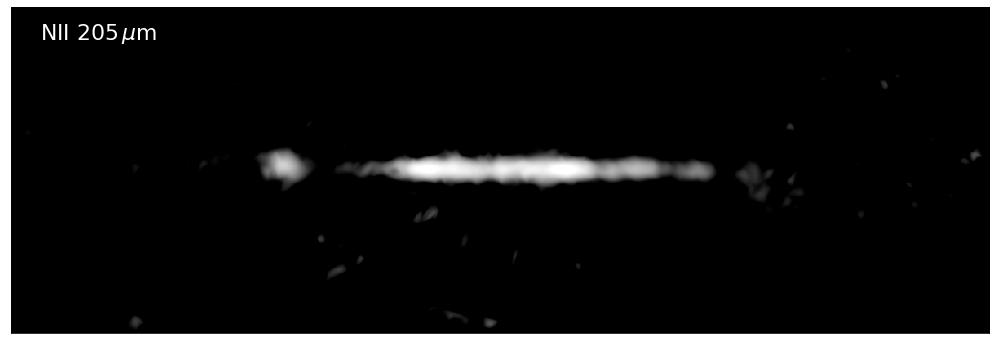

In [19]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

norm = ImageNormalize(im, vmin=1.5, vmax=20, stretch=AsinhStretch(0.1))
ax.imshow(im, cmap='gist_gray', origin='lower', norm=norm)
ax.text(0.03,0.9,r'NII $205\,\mu$m', {'color': 'w', 'fontsize': 22}, transform=ax.transAxes)

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 
plt.savefig('NII_allsky.pdf', bbox_inches='tight', pad_inches = 0)